In [ ]:
#@title Setup
!pip install -q ISR
!git clone https://github.com/idealo/image-super-resolution
%cd image-super-resolution
!python setup.py install
!pip install 'h5py<3.0.0'
import numpy as np
from PIL import Image
from ISR.models import RDN, RRDN

Cloning into 'image-super-resolution'...
remote: Enumerating objects: 1203, done.
remote: Total 1203 (delta 0), reused 0 (delta 0), pack-reused 1203
Receiving objects: 100% (1203/1203), 14.98 MiB | 32.78 MiB/s, done.
Resolving deltas: 100% (583/583), done.
/content/image-super-resolution/image-super-resolution
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating ISR.egg-info
writing ISR.egg-info/PKG-INFO
writing dependency_links to ISR.egg-info/dependency_links.txt
writing requirements to ISR.egg-info/requires.txt
writing top-level names to ISR.egg-info/top_level.txt
writing manifest file 'ISR.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'ISR.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-

In [ ]:
#@title Specify the path of image you want to do super-resolution
img_path = '/content/test.jpg' #@param {type:"string"}
img = Image.open(img_path)
lr_img = np.array(img)


**Model list:** <br>
RDN: psnr-large(1), psnr-small(2), noise-cancel(3) <br>
RRDN: gans(4)

for example :<br>
  rdn = RRDN(weights='gans')<br>
  rdn = RDN(weights='psnr-small')


66076672/66071288 [==============================] - 4s 0us/step


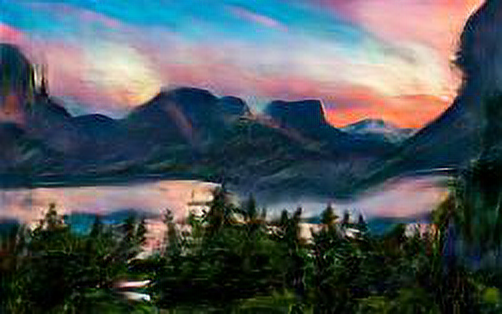

In [ ]:
#@title Choose the model you want to use
version = 2 #@param 
def pick(version):
  if version == 1:
    return RDN(weights='psnr-large')
  elif version == 2:
    return RDN(weights='psnr-small')
  elif version == 3:
    return RRDN(weights='noise-cancel')
  elif version == 4:
    return RRDN(weights='gans')
rdn = pick(version)
sr_img = rdn.predict(lr_img, by_patch_of_size=50)
Image.fromarray(sr_img)

In [ ]:
#@title Show the result and save it
result = Image.fromarray(sr_img)
save_path = '/content/test3.jpg' #@param {type:"string"}
result.save()